In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('finished_processed.csv')
dataset.drop(['backers_count', 'state'], axis=1, inplace=True)

target = dataset['usd_pledged']
features = dataset.drop(['usd_pledged'], axis=1)
print(features.keys())
#categorical_keys = ['category', 'country', 'currency', 'disable_communication', 'is_starrable', 
#                    'spotlight', 'staff_pick', 'location']
#lb = LabelEncoder()
#features = features.apply(lb.fit_transform)

Index(['category', 'country', 'creator', 'currency', 'disable_communication',
       'goal', 'is_starrable', 'staff_pick', 'location', 'blurb_length',
       'duration'],
      dtype='object')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)


In [5]:
forest_regressor = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=1)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [6]:
from sklearn.metrics import r2_score

predicted_train = forest_regressor.predict(X_train)
predicted_test = forest_regressor.predict(X_test)
r2_score(y_test, predicted_test)

0.1207588190552733

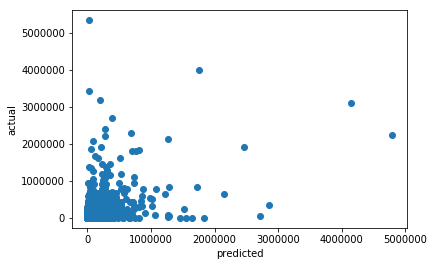

In [7]:

plt.xlabel('predicted')
plt.ylabel('actual')
plt.scatter(predicted_test, y_test)